# Advanced Statistical Analysis and Visualization of Group Data

This notebook serves as a comprehensive guide for conducting advanced statistical analysis and data visualizations.

### Importing and Setting Up Modules for Statistical Analysis

In [1]:
import sys
import os
import importlib

sys.path.insert(0, os.path.abspath('../src'))

import scripts.statistical_analysis
import configs

importlib.reload(sys.modules['scripts.statistical_analysis'])
importlib.reload(sys.modules['configs.config'])

from scripts.statistical_analysis import StatisticalAnalysis
from configs import config

import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display

### Loading and Previewing Cleaned Data

In [2]:
analysis = StatisticalAnalysis('../data/clean/cleaned_data.xlsx')
df_clean = analysis.load_clean_data()


df_subset_bmi_puls = analysis.generate_subset(config.columns_q1)
df_subset_priohand = analysis.generate_subset(config.columns_q2)
df_subset_geschlecht_wassermenge = analysis.generate_subset(config.columns_q3)
df_subset_blink = analysis.generate_subset(config.columns_q4)
df_subset_geschlecht_blink = analysis.generate_subset(config.columns_q5)
df_subset_height_luft = analysis.generate_subset(config.columns_q6)
df_subset_prio_luft = analysis.generate_subset(config.columns_q7)

df_clean.head()


,Gesamtgruppe,Type,Gruppe,Geschlecht,Geb.-Datum,"Alter, Jahre","Körpergröße, cm","Gewicht, Kg",BMI,Ruhepuls,Fußlänge Rechts (cm),Fußlänge Links (cm),Handlänge Rechts (cm),Handlänge Links (cm),Priorisierte Hand,Wassermenge (ml/Tag),Stamina Rechts (s),Stamina Links (s),Luftanhalten (s),Häufigkeit Blinzeln (/min)
0,1,Studierende,1,männlich,2005-01-20,19,160,58.0,22.7,56.0,24.0,24.0,17.0,17.0,rechsthänder,1400.0,180.0,160.0,53.0,34.137931
1,2,Studierende,1,männlich,2001-08-26,22,184,69.0,20.4,60.0,26.0,26.0,18.0,18.0,rechsthänder,1000.0,365.0,275.0,120.0,45.517241
2,3,Studierende,1,weiblich,2003-12-17,20,178,69.0,21.8,56.0,27.0,27.0,18.0,18.0,rechsthänder,1500.0,160.0,140.0,60.0,10.344828
3,4,Studierende,1,männlich,2004-01-01,20,187,92.0,26.3,72.0,28.0,28.0,20.0,20.0,rechsthänder,3000.0,NaN,NaN,85.0,NaN
4,5,Studierende,1,weiblich,2004-06-03,20,169,73.0,25.6,68.0,25.8,26.3,18.2,18.4,rechsthänder,2500.0,150.0,115.0,51.5,8.793103


## Descriptive statitics

#### Scale Types of Data

- **Nominal**: Categories without a meaningful order.
  - Type (Type of participants)
  - Geschlecht (Gender)
  - Priorisierte Hand (Dominant Hand)

- **Ordinal**: Categories with a meaningful order but no consistent difference between them.
  - Gruppe (Group)

- **Interval**: Numerical values with consistent differences but no true zero.
  - None in this dataset.

- **Ratio**: Numerical values with a true zero and consistent differences.
  - Alter, Jahre (Age in years)
  - Körpergröße, cm (Height in cm)
  - Gewicht, Kg (Weight in Kg)
  - BMI
  - Ruhepuls (Resting Heart Rate)
  - Fußlänge Rechts (cm) (Foot Length Right)
  - Fußlänge Links (cm) (Foot Length Left)
  - Handlänge Rechts (cm) (Hand Length Right)
  - Handlänge Links (cm) (Hand Length Left)
  - Wassermenge (ml/Tag) (Water Intake per Day)
  - Stamina Rechts (s) (Stamina Right Hand)
  - Stamina Links (s) (Stamina Left Hand)
  - Luftanhalten (s) (Breath Holding Duration)
  - Häufigkeit Blinzeln (/min) (Blink Frequency per Minute)


### Calculate descriptive statistics for Group 1, 2 and overall 

In [3]:
# Group data
group1 = df_clean[df_clean['Gruppe'] == 1]
group2 = df_clean[df_clean['Gruppe'] == 2]
overall = df_clean

In [4]:
# Calculate descriptive statistics
descriptive_stats_group1 = analysis.descriptive_stats(group1, config.numeric_columns)


# Display the descriptive statistics using the display function from IPython
print("Descriptive Statistics for Group 1")
display(descriptive_stats_group1)


Descriptive Statistics for Group 1


,count,mean,std,min,25%,50%,75%,max
Gesamtgruppe,74.0,38.07,21.94,1.00,19.25,38.50,56.75,75.00
Gruppe,74.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
"Alter, Jahre",74.0,22.89,2.61,18.00,21.00,22.50,24.00,31.00
"Körpergröße, cm",74.0,172.11,10.62,155.00,164.25,170.00,178.00,204.00
"Gewicht, Kg",74.0,70.04,15.91,43.00,58.00,69.00,80.00,130.00
BMI,74.0,23.64,4.86,17.50,20.42,23.00,24.92,47.20
Ruhepuls,71.0,68.72,9.76,51.00,63.00,69.00,74.00,98.00
Fußlänge Rechts (cm),68.0,24.98,1.87,22.00,23.50,25.00,26.05,30.00
Fußlänge Links (cm),68.0,24.99,1.89,22.00,23.38,25.00,26.00,30.00
Handlänge Rechts (cm),68.0,17.90,1.73,16.00,17.00,18.00,18.50,28.00


In [5]:
descriptive_stats_group2 = analysis.descriptive_stats(group2, config.numeric_columns)


columns_to_display = ['Gesamtgruppe', 'Gruppe', 'Alter, Jahre', 'Körpergröße, cm', 'Gewicht, Kg', 'BMI', 'Ruhepuls']
descriptive_stats_group2 = descriptive_stats_group2.loc[columns_to_display]

# Display the descriptive statistics using the display function from IPython
print("Descriptive Statistics for Group 2")
display(descriptive_stats_group2)




Descriptive Statistics for Group 2


,count,mean,std,min,25%,50%,75%,max
Gesamtgruppe,23.0,12.87,7.66,1.0,6.5,12.0,19.50,25.0
Gruppe,23.0,2.00,0.00,2.0,2.0,2.0,2.00,2.0
"Alter, Jahre",23.0,69.48,15.63,44.0,55.5,76.0,83.50,86.0
"Körpergröße, cm",23.0,180.48,10.97,157.0,173.5,182.0,188.00,198.0
"Gewicht, Kg",23.0,88.17,21.34,48.0,75.0,83.0,100.50,137.0
BMI,23.0,27.35,8.22,19.5,22.7,24.6,28.35,49.5
Ruhepuls,23.0,91.61,8.09,79.0,84.5,92.0,98.00,105.0


In [6]:
descriptive_stats_overall = analysis.descriptive_stats(overall, config.numeric_columns)
descriptive_stats_overall = descriptive_stats_overall.loc[columns_to_display]
descriptive_stats_overall = descriptive_stats_overall.drop(columns=['count'])
descriptive_stats_overall = descriptive_stats_overall.rename(columns={
            '25%': '25. Perzentil',
            '50%': '50. Perzentil',
            '75%': '75. Perzentil'
        })
descriptive_stats_overall.columns = descriptive_stats_overall.columns.str.capitalize()

# Display the descriptive statistics using the display function from IPython
print("Descriptive Statistics for overall Group ")
display(descriptive_stats_overall)


Descriptive Statistics for overall Group 


,Mean,Std,Min,25. perzentil,50. perzentil,75. perzentil,Max
Gesamtgruppe,32.09,22.26,1.0,13.0,26.0,51.00,75.0
Gruppe,1.24,0.43,1.0,1.0,1.0,1.00,2.0
"Alter, Jahre",33.94,21.40,18.0,22.0,24.0,30.00,86.0
"Körpergröße, cm",174.09,11.23,155.0,166.0,172.0,182.00,204.0
"Gewicht, Kg",74.34,18.89,43.0,60.0,73.0,84.00,137.0
BMI,24.52,6.00,17.5,21.2,23.2,25.20,49.5
Ruhepuls,74.32,13.60,51.0,65.0,72.0,83.75,105.0


In [7]:
# Save the Descriptive Statistics for Overall Group as a LaTeX table
analysis.save_as_latex(descriptive_stats_overall, '../graphs_and_tables/tables', 'descriptive_stats_overall')

### Plotting age histograms for each group

'../graphs_and_tables/histograms/histogram_Group 1_Alter, Jahre.png'

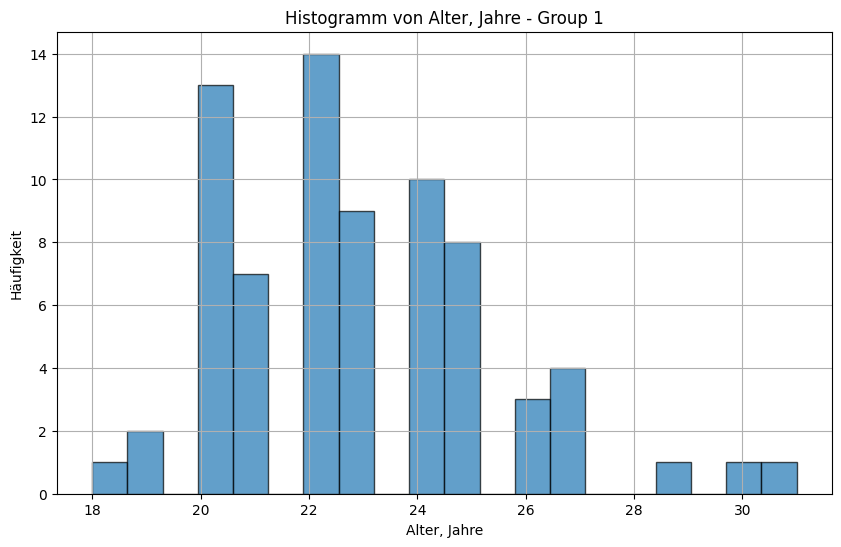

In [8]:
histo_save_path = '../graphs_and_tables/histograms'
# Create histograms for age in each group
analysis.create_histogram(group1, 'Alter, Jahre', 'Group 1', histo_save_path)

'../graphs_and_tables/histograms/histogram_Group 2_Alter, Jahre.png'

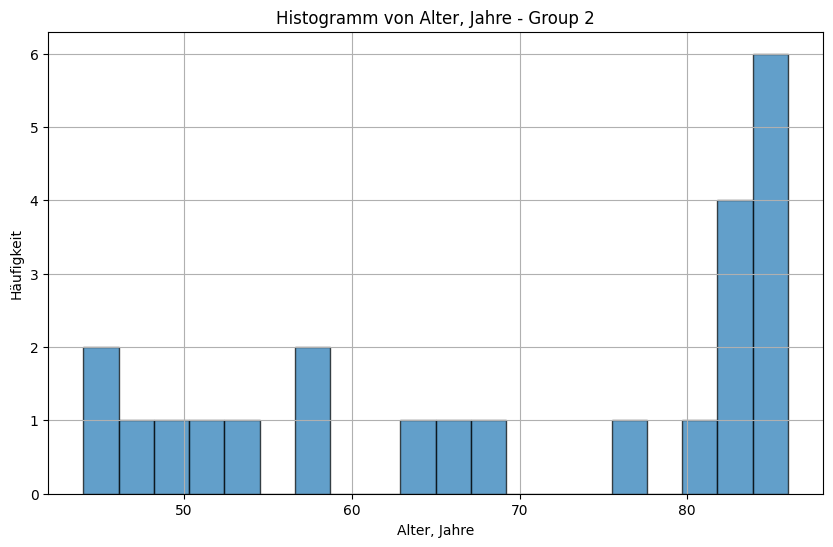

In [9]:
analysis.create_histogram(group2, 'Alter, Jahre', 'Group 2', histo_save_path)

'../graphs_and_tables/histograms/histogram_Overall Group_Alter, Jahre.png'

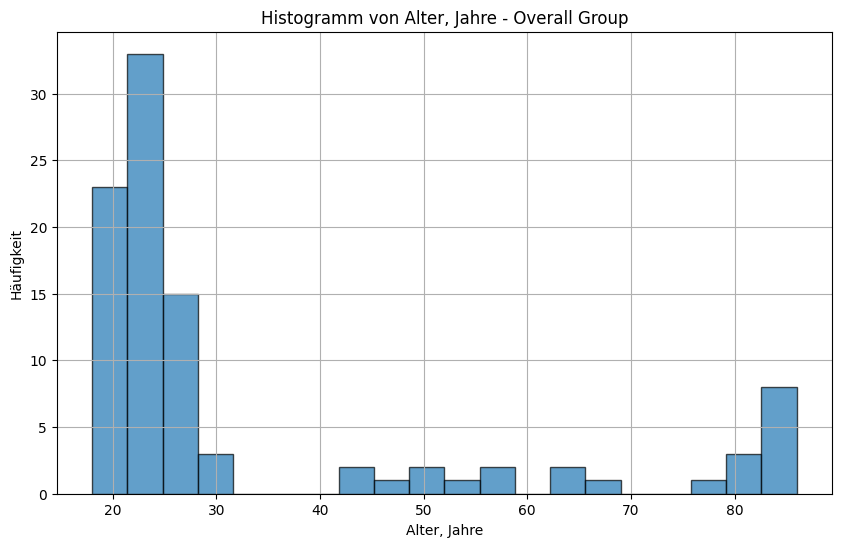

In [10]:
analysis.create_histogram(overall, 'Alter, Jahre', 'Overall Group', histo_save_path)